<a href="https://colab.research.google.com/github/ceyhan-sahinkaya/ceyhan-sahinkaya/blob/main/First_Pass_edited.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**MODULE 2- FIRST PASS**

Ceyhan Sahinkaya Akyol

This data contains all porosity permeability measurements and core plug description of released
Norwegian petroleum wells at the end of 2018.

### **What Should I Hope to Answer?**
From this dataset, I can explore:
- **Patterns and Correlations**: Examine how features like permeability and porosity relate to each other and to lithology.
- **Data Distributions**: Understand the statistical distribution of key variables like permeability and porosity.
- **Clustering or Classification**: Segment data into clusters (e.g., by lithology) or identify patterns that distinguish one group from another.
- **Missing Data Handling**: Explore how missing data might influence conclusions and decide on an imputation strategy.

**Data Import**

In [1]:
import pandas as pd
import numpy as np


# Direct link to the Google Drive CSV
url = 'https://drive.google.com/uc?id=1GBJ5vpKowoaAr3FChRH75U0IeY_e3Ohq'

# Load the dataset
data = pd.read_csv(url)

# Display the first few rows of the DataFrame
print(data.head())



  well_name    depth   per_hor_air   per_hor_kl  per_ver_air   per_ver_kl  \
0   1_2 -1   3126.03          0.07         0.39          NaN          NaN   
1   1_2 -1   3126.33          0.60        77.00          NaN          NaN   
2   1_2 -1   3126.64         88.00        74.00         74.0         64.0   
3   1_2 -1   3126.94         75.00       107.00          NaN          NaN   
4   1_2 -1   3127.25        121.00        48.00          NaN          NaN   

   por_hel  gain_dens  lithology  color  
0     29.7       2.65        NaN    NaN  
1     24.0       2.65        NaN    NaN  
2     28.6       2.66        NaN    NaN  
3     28.0       2.69        NaN    NaN  
4     22.8       2.65        NaN    NaN  


<ipython-input-1-41622838fd74>:9: DtypeWarning: Columns (4,6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(url)


### **Dataset Size**
The dataset contains **387,247 rows and 10 columns**. While it's a large dataset, it's not typically considered "big data," which usually involves billions of rows and requires distributed computing.

In [2]:
# Display the first few rows of the dataset and its info
data_head = data.head()
data_info = data.info()
data_missing = data.isnull().sum()

# Displaying initial observations
data_head, data_info, data_missing

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 387247 entries, 0 to 387246
Data columns (total 10 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   well_name     372787 non-null  object 
 1    depth        372705 non-null  float64
 2    per_hor_air  113146 non-null  float64
 3    per_hor_kl   104188 non-null  float64
 4    per_ver_air  78430 non-null   object 
 5    per_ver_kl   71311 non-null   float64
 6    por_hel      202286 non-null  object 
 7    gain_dens    317427 non-null  object 
 8    lithology    261641 non-null  object 
 9    color        243920 non-null  object 
dtypes: float64(4), object(6)
memory usage: 29.5+ MB


(  well_name    depth   per_hor_air   per_hor_kl  per_ver_air   per_ver_kl  \
 0   1_2 -1   3126.03          0.07         0.39          NaN          NaN   
 1   1_2 -1   3126.33          0.60        77.00          NaN          NaN   
 2   1_2 -1   3126.64         88.00        74.00         74.0         64.0   
 3   1_2 -1   3126.94         75.00       107.00          NaN          NaN   
 4   1_2 -1   3127.25        121.00        48.00          NaN          NaN   
 
    por_hel  gain_dens  lithology  color  
 0     29.7       2.65        NaN    NaN  
 1     24.0       2.65        NaN    NaN  
 2     28.6       2.66        NaN    NaN  
 3     28.0       2.69        NaN    NaN  
 4     22.8       2.65        NaN    NaN  ,
 None,
 well_name        14460
  depth           14542
  per_hor_air    274101
  per_hor_kl     283059
  per_ver_air    308817
  per_ver_kl     315936
  por_hel        184961
  gain_dens       69820
  lithology      125606
  color          143327
 dtype: int64)

In [3]:
# Print the shape of the dataset
print("Data Shape:", data.shape)

# Generate descriptive statistics
print("Data Description:\n", data.describe())


Data Shape: (387247, 10)
Data Description:
                depth    per_hor_air     per_hor_kl    per_ver_kl
count  372705.000000  113146.000000  104188.000000  71311.000000
mean     3128.992941     780.606019     752.598441    452.805069
std      1015.397359    2335.909213    2251.870921   1526.544162
min       100.595000       0.000000       0.002000      0.001000
25%      2393.350000       0.507000       0.350000      0.163500
50%      3089.900000      17.100000      15.000000      5.360000
75%      3843.600000     394.000000     374.000000    172.000000
max      6333.400000   43300.000000   42415.000000  50652.398400


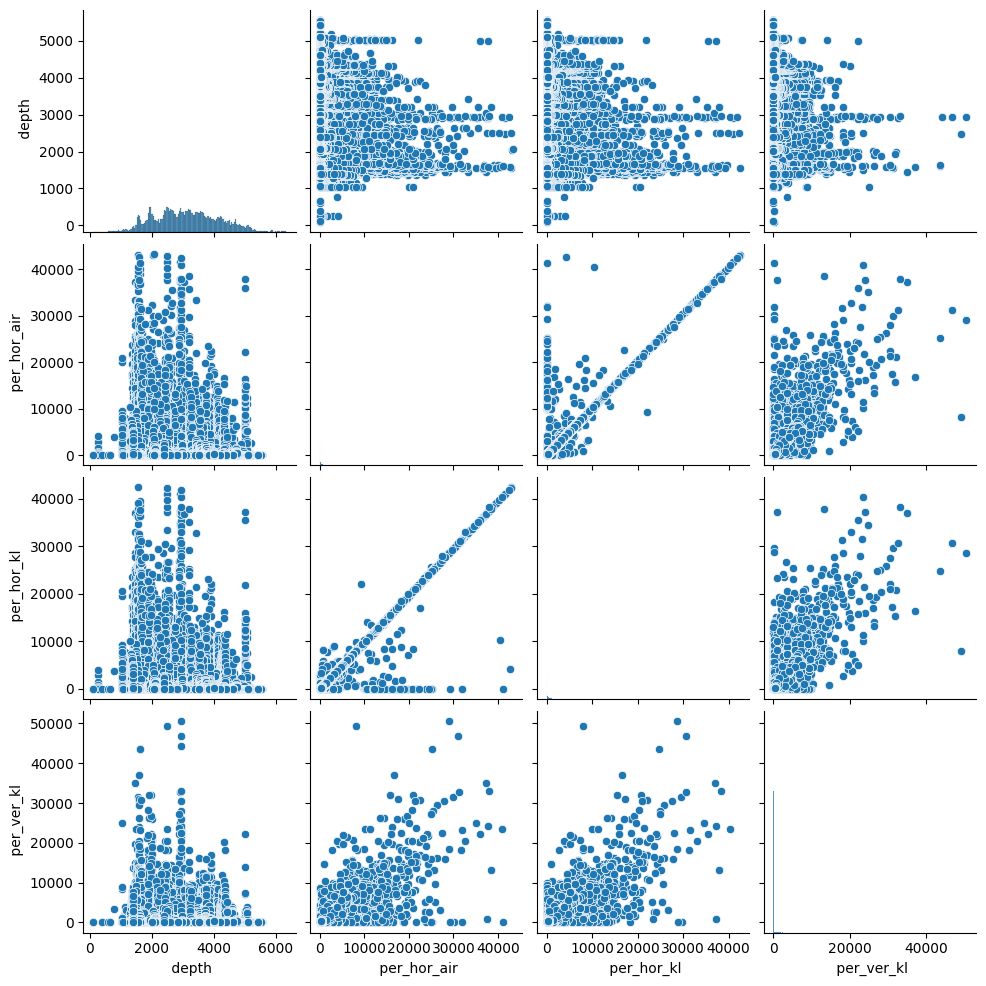

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

# Pair plot
sns.pairplot(data)
plt.show()


In [5]:
# Display data types of each column
print(data.dtypes)


well_name        object
 depth          float64
 per_hor_air    float64
 per_hor_kl     float64
 per_ver_air     object
 per_ver_kl     float64
 por_hel         object
 gain_dens       object
 lithology       object
 color           object
dtype: object


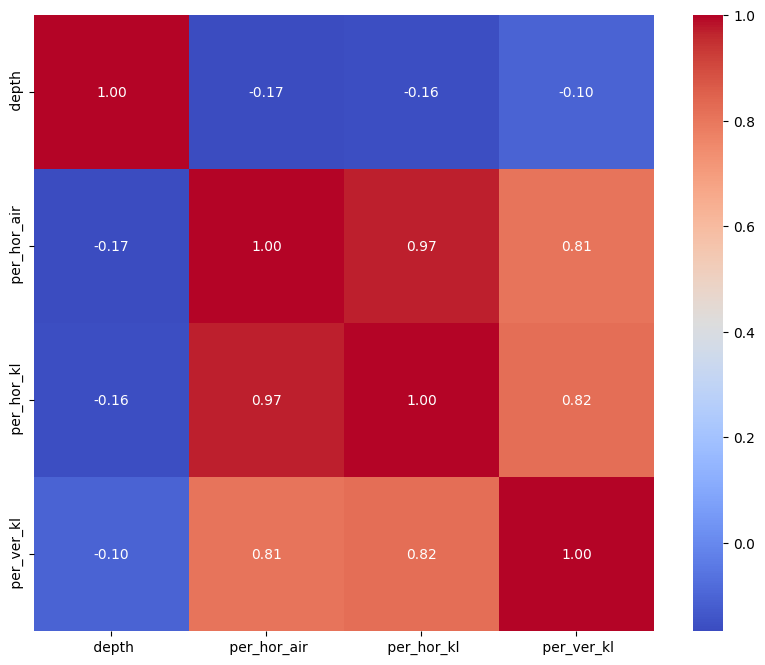

In [6]:
# Select only the numeric columns for the correlation matrix
numeric_data = data.select_dtypes(include=[np.number])  # np.number covers integers and floats

# Correlation matrix heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_data.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.show()


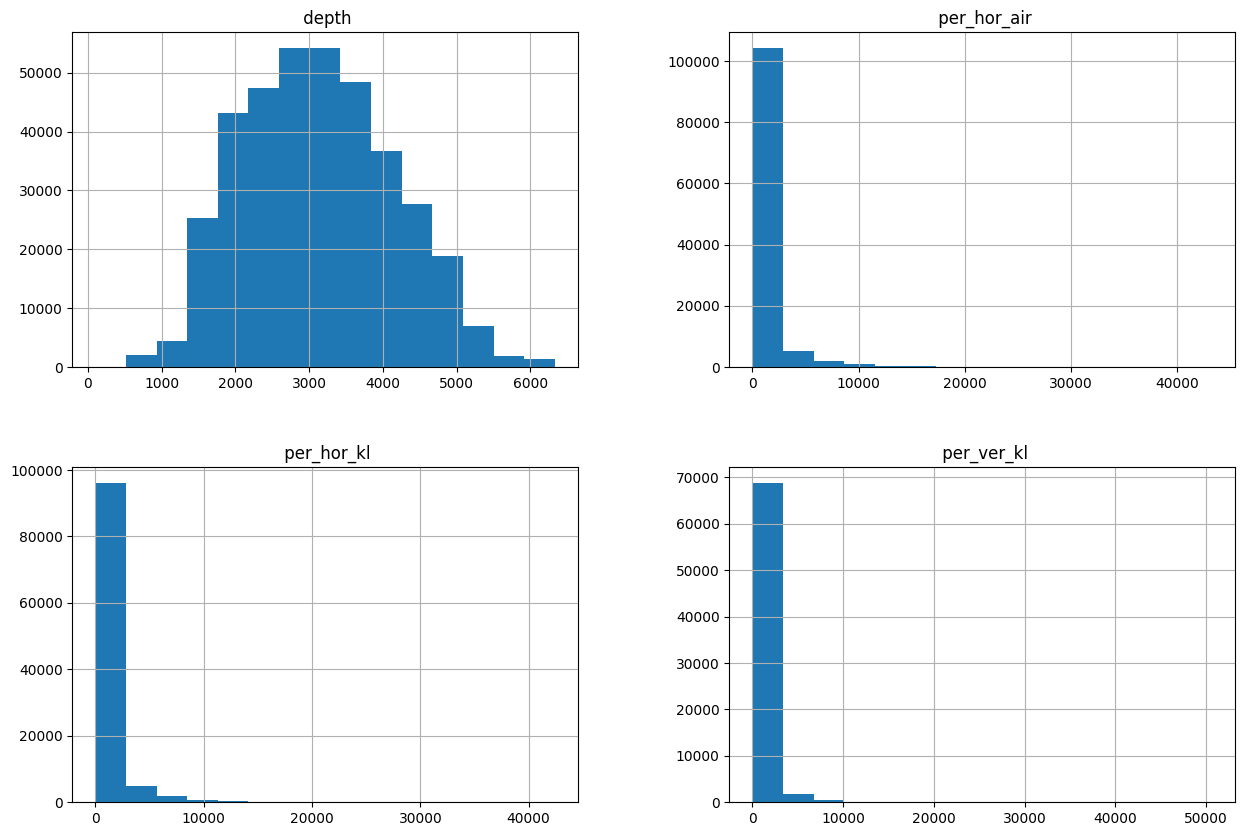

In [7]:
# Histograms for all features
data.hist(bins=15, figsize=(15, 10))
plt.show()


### **Missing Data**


- **Total Rows:** 387,247
- Columns with missing data:
  - `Permeability horizontal ka  (air)`: 274,101 missing values.
  - `Permeability horizontal ke  (klinkenberg corrected)`: 283,059 missing values.
  - `Permeability vertical ka  (air)`: 308,817 missing values.
  - `Permeability vertical ke  (klinkenberg corrected)`: 315,936 missing values.
  - `Porosity helium`: 184,961 missing values.
  - `main lithology`: 125,606 missing values.
  - `color`: 143,327 missing values.

In [8]:
# Check for missing values
print(data.isnull().sum())


well_name        14460
 depth           14542
 per_hor_air    274101
 per_hor_kl     283059
 per_ver_air    308817
 per_ver_kl     315936
 por_hel        184961
 gain_dens       69820
 lithology      125606
 color          143327
dtype: int64



### **Numerical and Non-Numerical EDA**
#### **Numerical EDA Highlights**:
- Summary statistics were calculated using `.describe()`, showing that features like permeability and porosity have a wide range of values with significant variance.
- A correlation heatmap revealed the relationships between numeric features.

#### **Non-Numerical EDA Highlights**:
- Non-numeric features like `main lithology` and `color` were identified. Analyzing these qualitatively or grouping by these features can provide additional insights.

CLEANING AND PREPARING DATA FOR ANALYSES

---



In [9]:
# 1. Standardize column names
data.columns = data.columns.str.strip().str.lower().str.replace(' ', '_')

# 2. Handle missing values
# Drop columns with more than 50% missing values
threshold = 0.5 * len(data)
data = data.dropna(thresh=threshold, axis=1)

# Drop rows with missing values
data = data.dropna()

# 3. Convert data types
# Convert columns with mixed types to numeric where applicable
numeric_columns = ['per_ver_air', 'por_hel', 'gain_dens']
for col in numeric_columns:
    if col in data.columns:
        data[col] = pd.to_numeric(data[col], errors='coerce')

# Drop any remaining rows with NaN values after conversion
data = data.dropna()

# 4. Remove duplicates
data = data.drop_duplicates()

# 5. Reset index
data = data.reset_index(drop=True)

# Display cleaned data information
cleaned_data_info = data.info()
cleaned_data_head = data.head()

cleaned_data_info, cleaned_data_head


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118676 entries, 0 to 118675
Data columns (total 6 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   well_name  118676 non-null  object 
 1   depth      118676 non-null  float64
 2   por_hel    118676 non-null  float64
 3   gain_dens  118676 non-null  float64
 4   lithology  118676 non-null  object 
 5   color      118676 non-null  object 
dtypes: float64(3), object(3)
memory usage: 5.4+ MB


(None,
   well_name    depth  por_hel  gain_dens  lithology       color
 0     1_3-6  2921.00     15.9       2.70  sandstone        grey
 1     1_3-6  2921.25     16.1       2.69  sandstone        grey
 2     1_3-6  2921.75     22.0       2.67  sandstone  light grey
 3     1_3-6  2922.00     23.2       2.66  sandstone  light grey
 4     1_3-6  2922.25     22.0       2.68  sandstone  light grey)

**Cleaning Summary**

**Column Names:**
Standardized to lowercase with underscores
(well_name, depth, etc.).

**Missing Data:**
Dropped columns with more than 50% missing values.
Removed rows with missing values.

**Data Types:**
Converted por_hel, gain_dens, and per_ver_air to numeric types.

**Duplicates:**
Removed duplicate rows.
Final Dataset:

118,676 rows and 6 columns: well_name, depth, por_hel, gain_dens, lithology, and color.


**First Analyses; KMean Clustering**
**1. Purpose of KMeans Clustering**

KMeans clustering is an unsupervised machine learning algorithm used to:



*   Group similar data points into clusters.
*   Discover patterns or structures in unlabeled
*   Reduce the complexity of large datasets by identifying representative groups.


**2. Steps in KMeans Clustering**

**Step 1:** Initialize Cluster Centroids
*   Specify the number of clusters,𝑘, as an input parameter.
*   Randomly initialize 𝑘 cluster centroids in the feature space.

**Step 2:** Assign Data Points to Clusters

*   For each data point, calculate its distance (e.g., Euclidean) from each cluster centroid.

*   Assign the data point to the nearest cluster.

**Step 3:** Update Cluster Centroids

*   Recompute the centroids by taking the mean of all points in each cluster.

*   The centroid is the "center of gravity" for its assigned points.

**Step 4:** Repeat Steps 2 and 3
* Continue reassigning points and recalculating centroids until:

*   The cluster assignments no longer change.
*   Or, the centroids move by less than a set threshold.

**Step 5:** Evaluate the Clustering
* Measure the quality of clustering using metrics like:

* Inertia: Sum of squared distances of samples to their closest cluster center.
* Silhouette Score: Measures how similar a point is to its own cluster compared to others.

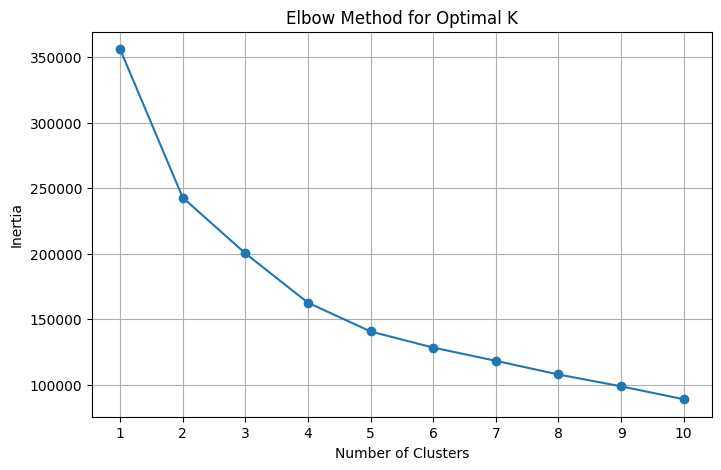

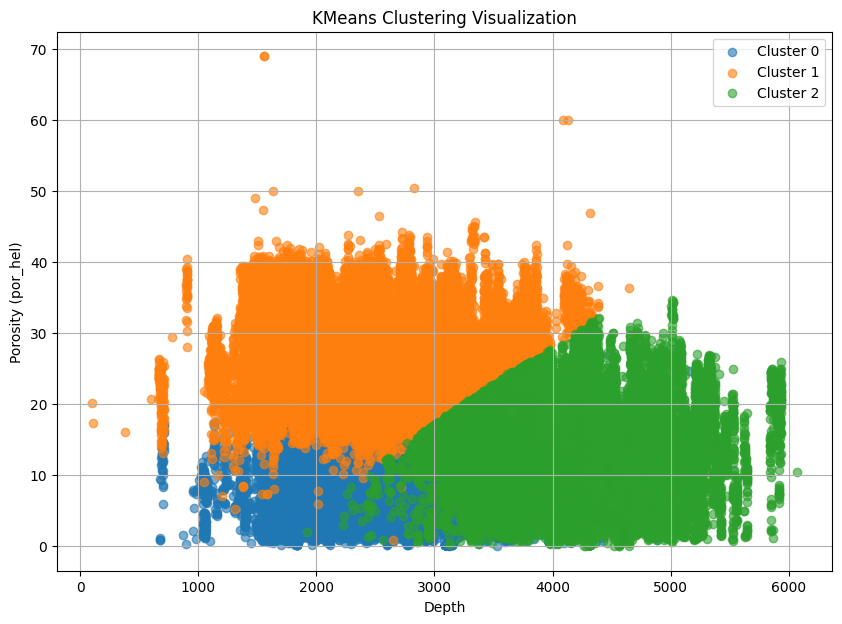

In [10]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Selecting numeric columns for clustering
numeric_data = data[['depth', 'por_hel', 'gain_dens']]

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_data)

# Determine the optimal number of clusters using the Elbow Method
inertia = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

# Plot the Elbow curve
plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.xticks(k_range)
plt.grid(True)
plt.show()

# Perform KMeans with an optimal number of clusters (e.g., 3 based on the elbow curve)
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans.fit_predict(scaled_data)

# Add cluster labels to the dataset
data['cluster'] = clusters


# Visualize the clustering result using a scatter plot
plt.figure(figsize=(10, 7))
for cluster in range(optimal_k):
    cluster_data = data[data['cluster'] == cluster]
    plt.scatter(cluster_data['depth'], cluster_data['por_hel'], label=f'Cluster {cluster}', alpha=0.6)

plt.title('KMeans Clustering Visualization')
plt.xlabel('Depth')
plt.ylabel('Porosity (por_hel)')
plt.legend()
plt.grid(True)
plt.show()


**3. Outcomes of KMeans Clustering**

Output:
* Cluster Assignments: Each data point is labeled with its assigned cluster.

* Cluster Centroids: The coordinates of the final cluster centroids.

* Metrics: Inertia and silhouette scores to evaluate the clustering performance.

**Insights Gained:**

* Grouping Similar Points: Identifies data points that share similar characteristics.
E.g., grouping customers based on purchase behavior.

* Patterns and Trends: Reveals hidden patterns in the dataset.

* Dimensionality Reduction: Clusters can represent high-dimensional data in a simpler form.

* Anomaly Detection: Points far from any cluster can be considered outliers.

**HDBSCAN**

HDBSCAN (Hierarchical Density-Based Spatial Clustering of Applications with Noise) is a clustering algorithm that builds upon DBSCAN but is more flexible and adaptive. Here’s a breakdown of the HDBSCAN analysis and what it reveals:

**1. Purpose of HDBSCAN**

* Group data points based on their density in the feature space.

* Identify clusters of varying shapes, sizes, and densities.

* Handle noise points effectively by labeling them as -1.

* Automatically determine the number of clusters (unlike KMeans).


**2. Key Parameters in HDBSCAN**

* min_cluster_size:

 Minimum size of a cluster. Smaller values lead to more clusters.

* min_samples:

 Number of points required for a point to be considered "core."

* Metric:

 Distance metric used to measure similarity (e.g., Euclidean, Manhattan).

**3. Steps in HDBSCAN Analysis**

**Step 1:**  Build a Minimum Spanning Tree (MST)

* Construct an MST from the pairwise distances between points.

**Step 2:** Condense the MST

* Collapse edges with low density (sparse areas).

* Identify clusters in high-density regions.

**Step 3:** Extract Stable Clusters

* Use hierarchical clustering to merge or split clusters based on density thresholds.

**Step 4:** Label Noise Points

* Points that don’t belong to any cluster (low-density regions) are labeled as -1.

**4. Key Metrics in HDBSCAN**

* Number of Clusters:
 The number of clusters identified by the algorithm (excluding noise).

* Noise Points:
 Points labeled as -1 are considered noise or outliers.

* Cluster Stability:
Each cluster is assigned a stability score, representing its robustness.


**5. Strengths of HDBSCAN**

* Varying Densities:
  Unlike KMeans, which assumes uniform density, HDBSCAN can find clusters of varying densities.

* No Predefined Cluster Number:
Automatically determines the optimal number of clusters.

* Noise Handling:
Separates noise points effectively without forcing them into clusters.


**6. Insights from HDBSCAN**

* Flexible Clustering:
Identifies clusters of irregular shapes and densities.

* Noise Identification:
Points labeled as -1 may be anomalies or outliers.
* Optimal Number of Clusters:
Removes the need for manual tuning like KMeans.


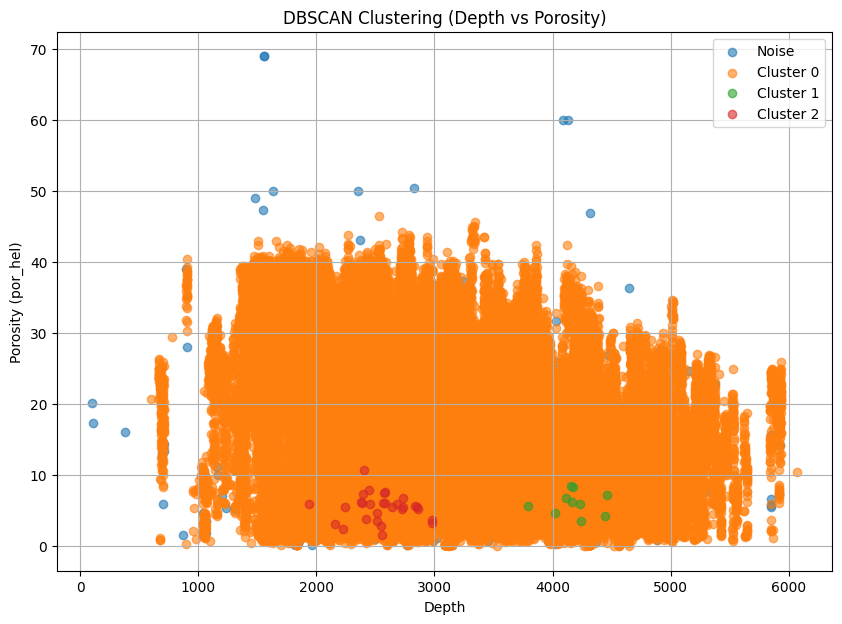

In [11]:

from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score


# Perform DBSCAN clustering
dbscan = DBSCAN(eps=0.5, min_samples=10)
dbscan_clusters = dbscan.fit_predict(scaled_data)

# Add DBSCAN cluster labels to the dataset
data['dbscan_cluster'] = dbscan_clusters

# Check the number of clusters found (excluding noise points labeled as -1)
unique_clusters = np.unique(dbscan_clusters)
num_clusters = len(unique_clusters) - (1 if -1 in unique_clusters else 0)

# Calculate silhouette score if applicable
if num_clusters > 1:
    silhouette_avg = silhouette_score(scaled_data, dbscan_clusters)
else:
    silhouette_avg = "Not Applicable (less than 2 clusters found)"

# Display results
results_summary = {
    "Number of Clusters (excluding noise)": num_clusters,
    "Silhouette Score": silhouette_avg,
}
import matplotlib.pyplot as plt

# Scatter plot for DBSCAN clusters
plt.figure(figsize=(10, 7))
for cluster in unique_clusters:
    cluster_data = data[data['dbscan_cluster'] == cluster]
    plt.scatter(
        cluster_data['depth'],
        cluster_data['por_hel'],
        label=f'Cluster {cluster}' if cluster != -1 else 'Noise',
        alpha=0.6
    )
plt.title('DBSCAN Clustering (Depth vs Porosity)')
plt.xlabel('Depth')
plt.ylabel('Porosity (por_hel)')
plt.legend()
plt.grid(True)
plt.show()





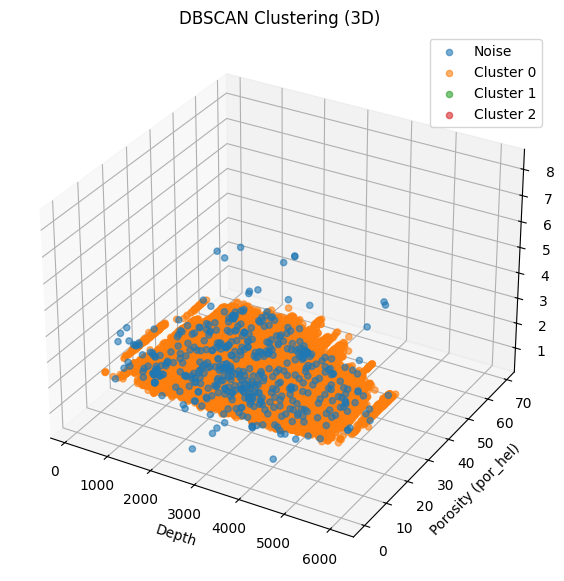

In [12]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

for cluster in unique_clusters:
    cluster_data = data[data['dbscan_cluster'] == cluster]
    ax.scatter(
        cluster_data['depth'],
        cluster_data['por_hel'],
        cluster_data['gain_dens'],
        label=f'Cluster {cluster}' if cluster != -1 else 'Noise',
        alpha=0.6
    )
ax.set_title('DBSCAN Clustering (3D)')
ax.set_xlabel('Depth')
ax.set_ylabel('Porosity (por_hel)')
ax.set_zlabel('Gain Density (gain_dens)')
ax.legend()
plt.show()


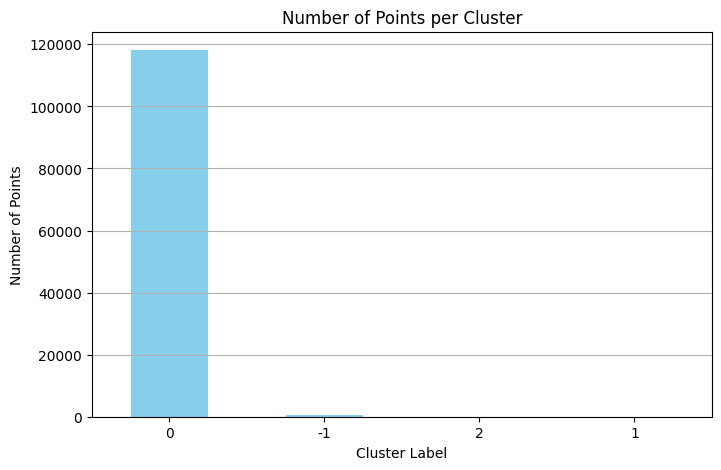

In [13]:
cluster_counts = data['dbscan_cluster'].value_counts()

plt.figure(figsize=(8, 5))
cluster_counts.plot(kind='bar', color='skyblue')
plt.title('Number of Points per Cluster')
plt.xlabel('Cluster Label')
plt.ylabel('Number of Points')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


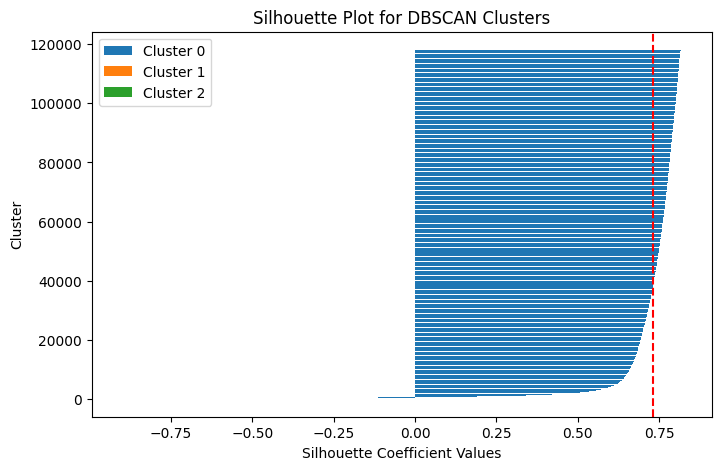

In [14]:
from sklearn.metrics import silhouette_samples
import numpy as np

if num_clusters > 1:
    silhouette_vals = silhouette_samples(scaled_data, dbscan_clusters)
    y_ticks = []
    y_lower = 10

    plt.figure(figsize=(8, 5))
    for i in unique_clusters:
        if i == -1:
            continue
        cluster_silhouette_vals = silhouette_vals[dbscan_clusters == i]
        cluster_silhouette_vals.sort()
        y_upper = y_lower + len(cluster_silhouette_vals)
        plt.barh(
            range(y_lower, y_upper),
            cluster_silhouette_vals,
            edgecolor='none',
            label=f'Cluster {i}'
        )
        y_lower = y_upper + 10
    plt.axvline(x=silhouette_avg, color="red", linestyle="--")
    plt.title('Silhouette Plot for DBSCAN Clusters')
    plt.xlabel('Silhouette Coefficient Values')
    plt.ylabel('Cluster')
    plt.legend()
    plt.show()
else:
    print("Silhouette plot is not applicable (less than 2 clusters).")


**Principal Component Analysis (PCA)**

**1. Purpose of PCA**

Principal Component Analysis (PCA) is a statistical technique used for:

Dimensionality Reduction:
Reducing the number of variables in a dataset while retaining as much variability (information) as possible. It helps simplify complex datasets and mitigate the "curse of dimensionality."

Feature Extraction:
Identifying and creating new, uncorrelated features (principal components) that summarize the variability in the data.

Data Visualization:
Transforming high-dimensional data into two or three dimensions for easier visualization and pattern recognition.

Noise Reduction:
Removing less significant components (noise) that contribute little to the data's variability.

Collinearity Mitigation:
Addressing multicollinearity by creating orthogonal (independent) principal components from correlated variables.


**2. Key Concepts in PCA**

### Key Concepts in PCA (Briefly)

1. **Dimensionality Reduction:** Reduces data dimensions while retaining the most variance.
2. **Principal Components:** New uncorrelated axes that capture variance in descending order (PC1 > PC2 > PC3, etc.).
3. **Orthogonality:** Principal components are orthogonal, ensuring no redundancy.
4. **Variance Explained:** Shows how much of the total variability each component captures.
5. **Data Transformation:** Projects data onto principal components for simplified representation.
6. **Applications:** Used for data visualization, noise reduction, feature extraction, and preprocessing for machine learning.


**3. Steps in APC**

**Step 1:** Standardize the Data
PCA requires the data to be standardized so that each feature contributes equally to the analysis.


Standardization ensures that the mean of each feature is 0 and the standard deviation is 1.

Use tools like StandardScaler in Python's scikit-learn library.



**Step 2:** Compute the Covariance Matrix

Calculate the covariance matrix to understand how features vary with respect to each other.

The covariance matrix is a square matrix of size
𝑛
×
𝑛
, where
𝑛
 is the number of features.


**Step 3:** Compute Eigenvalues and Eigenvectors

Perform eigen decomposition on the covariance matrix:

Eigenvalues: Represent the variance explained by each principal component.

Eigenvectors: Represent the direction of the principal components in the feature space.

Eigen decomposition helps identify the axes along which the data has the most variance.


**Step 4:** Select Principal Components

Sort eigenvalues in descending order and select the top
𝑘 components that explain the most variance.

Use the explained variance ratio to decide how many components to retain.

For example, retain components that explain 95% of the variance cumulatively.


**Step 5:** Project Data onto Principal Components

Transform the original data by projecting it onto the selected principal components.

Formula:
𝑍
=
𝑋
⋅
𝑊

𝑍: Transformed data (principal components).

𝑋: Standardized original data.

𝑊: Matrix of eigenvectors corresponding to the selected principal components.


**Step 6:** Analyze and Interpret the Results

Evaluate the transformed data:

Check the explained variance of each principal component.

Visualize the data using the first two or three principal components (scatter plots, 3D plots).

Use the transformed data for further analysis, such as clustering or classification.




In [15]:

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


# Select numeric columns for PCA
numeric_data = data.select_dtypes(include=['float64', 'int64'])

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_data)

# Perform PCA
pca = PCA()
pca_result = pca.fit_transform(scaled_data)

# Add PCA results back to the dataset
pca_columns = [f'PC{i+1}' for i in range(pca.n_components_)]
pca_df = pd.DataFrame(pca_result, columns=pca_columns)
data_with_pca = pd.concat([data.reset_index(drop=True), pca_df], axis=1)

# Explained variance ratio for each principal component
explained_variance_ratio = pca.explained_variance_ratio_
# Explained Variance Ratios
for i, ratio in enumerate(explained_variance_ratio, start=1):
    print(f"PC{i}: {ratio * 100:.2f}% of the variance")






PC1: 35.31% of the variance
PC2: 27.07% of the variance
PC3: 22.74% of the variance
PC4: 14.88% of the variance


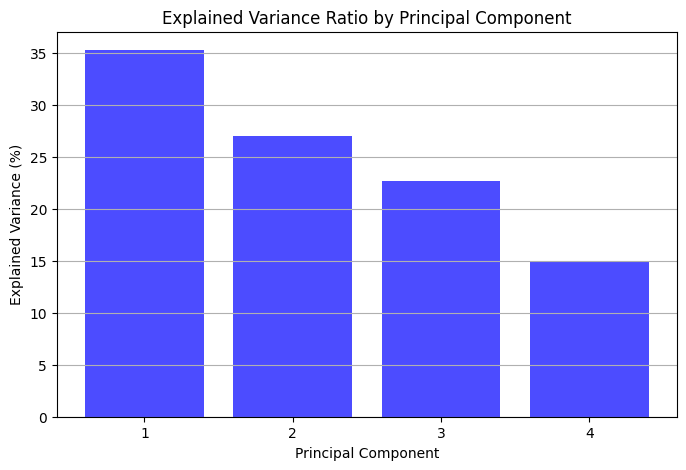

In [16]:
import matplotlib.pyplot as plt

# Plot the explained variance ratio
plt.figure(figsize=(8, 5))
plt.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio * 100, alpha=0.7, color='blue')
plt.title('Explained Variance Ratio by Principal Component')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance (%)')
plt.xticks(range(1, len(explained_variance_ratio) + 1))
plt.grid(axis='y')
plt.show()


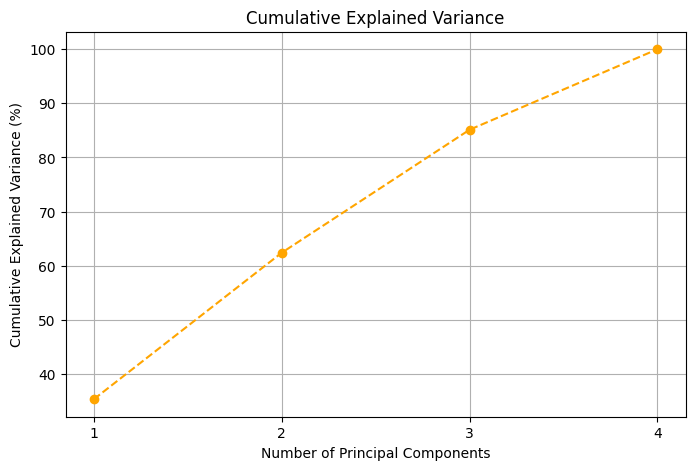

In [17]:
# Plot cumulative explained variance
cumulative_variance = explained_variance_ratio.cumsum() * 100
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--', color='orange')
plt.title('Cumulative Explained Variance')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance (%)')
plt.xticks(range(1, len(cumulative_variance) + 1))
plt.grid()
plt.show()


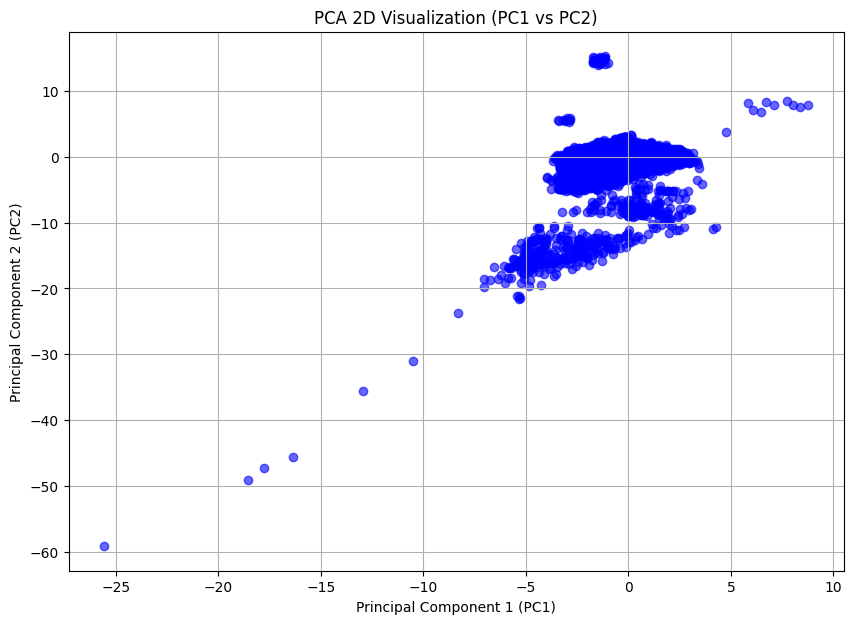

In [18]:
plt.figure(figsize=(10, 7))
plt.scatter(data_with_pca['PC1'], data_with_pca['PC2'], alpha=0.6, c='blue')
plt.title('PCA 2D Visualization (PC1 vs PC2)')
plt.xlabel('Principal Component 1 (PC1)')
plt.ylabel('Principal Component 2 (PC2)')
plt.grid()
plt.show()


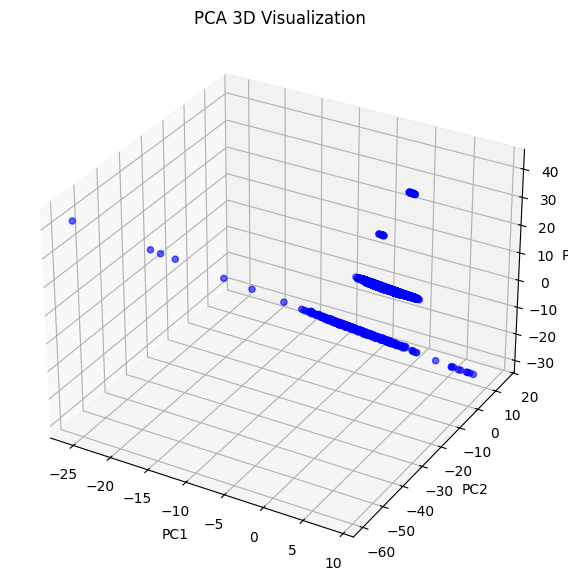

In [19]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data_with_pca['PC1'], data_with_pca['PC2'], data_with_pca['PC3'], alpha=0.6, c='blue')
ax.set_title('PCA 3D Visualization')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
plt.show()


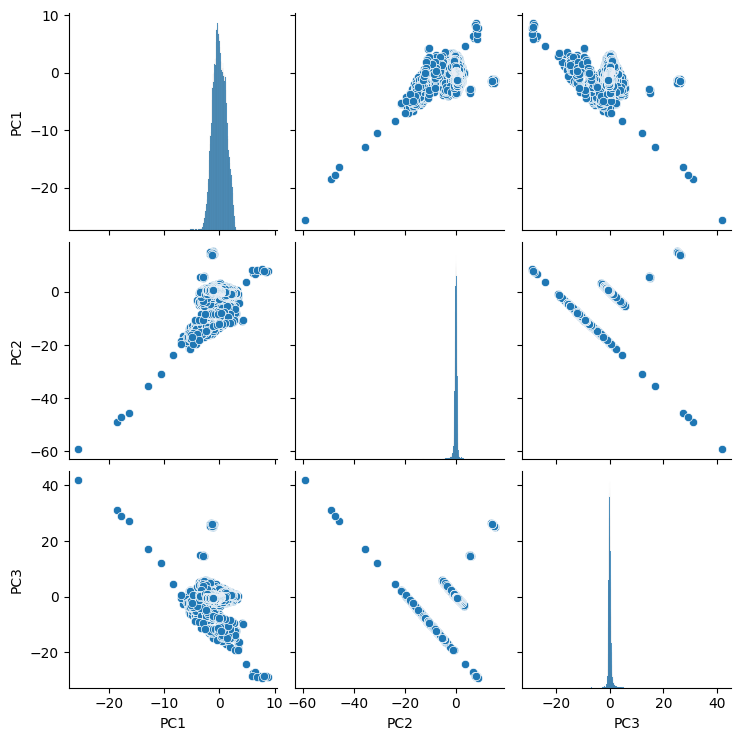

In [20]:
import seaborn as sns

# Pairplot of the first few principal components
sns.pairplot(data_with_pca[['PC1', 'PC2', 'PC3']])
plt.show()


**5. Key Outputs of PCA:**

* Principal Components: New uncorrelated features.

* Explained Variance Ratio: Variance captured by each principal component.

* Transformed Data: Data represented in the principal component space.


### Comparison of KMeans Clustering, HDBSCAN, and PCA

| **Aspect**                | **KMeans Clustering**                                                                 | **HDBSCAN**                                                                 | **PCA**                                                                                                                                                    |
|---------------------------|---------------------------------------------------------------------------------------|-----------------------------------------------------------------------------|------------------------------------------------------------------------------------------------------------------------------------------------------------|
| **Purpose**               | Group data into \( k \) predefined clusters.                                         | Group data based on density and automatically determine clusters.           | Reduce dimensionality and retain maximum variability for feature extraction and visualization.                                                             |
| **Cluster Shape**         | Assumes spherical clusters.                                                          | Handles varying shapes and densities.                                       | Not applicable (not a clustering algorithm).                                                                                                               |
| **Noise Handling**        | Does not explicitly handle noise.                                                    | Labels noise points explicitly as outliers (-1).                            | Reduces noise indirectly by focusing on high-variance components.                                                                                          |
| **Scalability**           | Scalable for large datasets.                                                         | Scales well with large datasets.                                            | Computationally intensive for large datasets but can use optimized techniques (e.g., Incremental PCA).                                                     |
| **Number of Clusters**    | Must be predefined by the user.                                                      | Automatically determines the number of clusters.                            | Not applicable (no clustering performed).                                                                                                                  |
| **Strengths**             | Simple and efficient for well-separated spherical clusters.                          | Flexible, identifies clusters of varying densities, and separates noise.    | Simplifies high-dimensional data, visualizes patterns, and mitigates multicollinearity.                                                                    |
| **Limitations**           | Sensitive to initial centroid selection and outliers.                                | Can be computationally expensive and sensitive to parameter tuning.         | Loses interpretability of original features; computationally expensive for very large datasets.                                                            |
| **Applications**          | Customer segmentation, document clustering, etc.                                     | Anomaly detection, geospatial data clustering, etc.                         | Data preprocessing, visualization, noise reduction, and feature extraction for clustering or machine learning tasks.                                       |
| **Key Metrics**           | Inertia, Silhouette Score.                                                           | Cluster Stability, Noise Points, Number of Clusters.                        | Explained Variance Ratio, Principal Components.                                                                                                             |
"""




**Which method did you like the most?**  
I found HDBSCAN to be the most effective method. Its ability to identify clusters of varying shapes and densities, coupled with its explicit noise handling, made it highly suitable for analyzing geologic data. I also appreciated that it automatically determines the number of clusters, eliminating the need for manual selection, which aligns well with the complexity of geologic formations.


**Which method did you like the least?**  
The method I liked the least was KMeans Clustering. While it’s simple and computationally efficient, its assumption of spherical clusters and sensitivity to outliers made it less effective for my dataset. Additionally, having to predefine the number of clusters was challenging because the geologic data didn’t naturally lend itself to such assumptions.



**How did you score these unsupervised models?**  
I evaluated these methods based on several criteria:
1. **Clustering Accuracy:** How well the results matched known geologic patterns.
2. **Noise Handling:** The ability to exclude irrelevant or noisy data points.
3. **Flexibility:** Whether the method could adapt to the varying shapes and densities of clusters.
4. **Scalability:** Performance with larger datasets.
5. **Interpretability:** Whether the results provided meaningful insights into the geologic features.

Based on these criteria, HDBSCAN performed the best due to its robust handling of complex cluster structures and noise. PCA was helpful in visualizing relationships between variables but not for direct clustering. KMeans, while fast, struggled to represent the irregularities in the data accurately.



**Did the output align with your geologic understanding?**  
The results from HDBSCAN aligned well with my geologic understanding. Its ability to handle varying densities allowed it to detect clusters that corresponded to distinct lithologies or variations in porosity and density. PCA was also useful for reducing dimensionality and highlighting relationships between features, making patterns in the data easier to interpret. On the other hand, KMeans struggled to capture the nuances of geologic structures, particularly where cluster shapes were irregular.



**What did you want to learn more about?**  
I would like to dive deeper into the parameters of **HDBSCAN**, such as `min_cluster_size` and `min_samples`, to understand their impact on the results. Additionally, I want to explore how PCA-derived components correlate with specific geologic features. Lastly, understanding how pre-processing decisions, like standardization or outlier handling, influence the clustering results would be valuable.



**Did you pre-process your data?**  
Yes, I pre-processed the data to ensure meaningful and accurate results. This included:
1. Standardizing the data to give equal weight to all features.
2. Dropping columns with excessive missing data and filling or removing remaining gaps.
3. Cleaning non-numeric columns, converting mixed types, and removing duplicates.

These steps ensured that the analyses were not biased by scale differences or data inconsistencies.


**What was a decision you were most unsure about?**  
One of the most uncertain decisions was determining the optimal parameters for **HDBSCAN**, particularly `min_cluster_size` and `min_samples`. These settings significantly impacted the clustering results and required careful tuning. Additionally, selecting the number of principal components in PCA was challenging, as I had to balance dimensionality reduction with information retention. Finally, deciding on the value of \( k \) in KMeans was difficult due to the lack of a clear number of natural clusters in the data.

